# Introduction

This manual defines and documents the conventions, methodology, and information flow associated with the System Advisor Model (SAM) physical trough model in the System Advisor Model [10]. A detailed overview of each subsystem is provided, with the engineering/mathematical basis laid out where appropriate. While this documentation contains general information on the model structure, the beginning modeler may find portions of the content challenging. For an introductory overview on how to use the model, please refer to the System Advisor help system. Definitions of technical terms (denoted with _italic_ text) are provided in the Glossary of Terms at the end of this document (page 112).

The System Advisor Model provides a consistent framework for analyzing and comparing power system costs and performance across the range of solar technologies and markets, from photovoltaic (PV) systems for residential and commercial markets to concentrating solar power and large PV systems for utility markets.

System Advisor is based on an hourly simulation engine that interacts with performance, cost, and finance models to calculate energy output, energy costs, and cash flows. The software can also account for the effect of incentives on cash flows. System Advisor's spreadsheet interface allows for exchanging data with external models developed in Microsoft(r) Excel. Most of System Advisor's inputs can be used as parametric variables for sensitivity studies to investigate impacts of variations in performance, cost, and financial parameters on model results.

## _TRNSYS simulation framework_

System Advisor models system performance using the TRNSYS1 software developed at the University of Wisconsin combined with customized components. TRNSYS is a validated, time-series simulation program that can simulate the performance of photovoltaic, concentrating solar power, water heating systems, and other renewable energy systems using hourly resource data. TRNSYS is integrated into System Advisor so there is no need to install TRNSYS software or be familiar with its use to run Solar Advisor.

Footnote 1: For more information on the TRNSYS software, refer to documentation from the University of Wisconsin at sel.me.wisc.edu/trnsys/default.htm

The default source code folder \(\backslash\)SAM\(\backslash\)<version number>\(\backslash\)exelib\(\backslash\)trnsys\(\backslash\)source contains the FORTRAN code for each TRNSYS module: sam_mw_trough_Type250.f90 (solar field), sam_mw_trough_Type251.f90 (storage and dispatch), sam_mw_pt_Type224.f90 (power cycle), and the shared HTF property subroutines sam_mw_pt_Type229.f90 and sam_mw_pt_propmod.

## _Variable Names and Abbreviations_

The following tables contain information and conventions used in this document. Table 1 lists the abbreviations, Table 2 lists variable naming conventions, and Table 3 list commonly used variable subscript conventions.

\begin{array}{l|l}
\textbf{Abbreviation} & \textbf{Description} \\
\hline
ACC & Air-cooledcondenser \\
CSP & Concentrating SolarPower \\
DNI & Direct-normal irradiation \\
HTF & Heat transfer fluid \\
IAM & Incidence anglemodifier \\
IOCop & Inlet/outlet/cross-overpipe \\
ITD & Initial temperaturedifference \\
LHV & Lowerheatingvalue \\
NREL & National RenewableEnergyLaboratory \\
SAM & System AdvisorModel \\
TES & Thermal energystorage \\
TOU & Timeofuse \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
A & Area & meters squared & m^2 \\
c, c_{p} & Specific heat & Joules per kilogram Kelvin & \frac{J}{kgK} \\
C & Calculation coefficient & varies & varies \\
\dot{C} & Thermal capacity rate & Watts per Kelvin & \frac{W}{K} \\
D & Diameter & meters & m \\
E & Energy & Joules & J \\
g & Gravitation constant & meters per sq. second & \frac{m}{s^2} \\
f & Fraction & none & none \\
fr & Friction factor & none & none \\
h & Enthalpy & Joules per kilogram & \frac{J}{kg} \\
H & Height & meters & m \\
i,j & Counting indexes & none & none \\
I_{bn} & Direct solar irradiation & Watts per sq. meter & \frac{W}{m^2} \\
k & Thermal conductivity & Watts per meter-Kelvin & \frac{W}{m\cdot K} \\
L & Length & meters & m \\
m & Mass & kilograms & kg \\
\dot{m} & Mass flow rate & kilograms per second & \frac{kg}{s} \\
(mc) & Thermal inertia & Joules per Kelvin & \frac{J}{K} \\
N & Integer number & none & none \\
Nu & Nusselt number & none & none \\
P & Pressure & Pascals & Pa \\
Pr & Prandtl number & none & none \\
\dot{q} & Heat transfer rate & Watts & W \\
\dot{Q} & Cycle heat absorption rate & Watts & W \\
r & Ratio & none & none \\
R & Radius & meters & m \\
\dot{R} & Thermal resistance & Watts per Kelvin & \frac{W}{K} \\
Ra & Rayleigh number & none & none \\
Re & Reynolds number & none & none \\
s & Entropy & Joules per kilogram Kelvin & \frac{J}{kg} \\
T & Temperature & Kelvin & K \\
\overline{T} & Average temperature & Kelvin & K \\
t & Time & seconds & s \\
u & Specific internal energy & Joules per kilogram & \frac{J}{kg} \\
U & Internal energy & Joules & J \\
UA & Thermal conductance & Watts per Kelvin & \frac{W}{K} \\
v & Velocity & meters per second & \frac{m}{s} \\
\overline{V} & Volume & meters cubed & m^3 \\
\dot{W} & Cycle power output & Watts & W \\
\hline
\end{array}

\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Description} & \textbf{Units} & \textbf{Units Abbrv.} \\
\hline
\alpha & Absortance & none & none \\
\beta & Volumetric expansion coef. & inverse Kelvin & \frac{1}{K} \\
\Delta & Change in value & none & none \\
\gamma & Thermal loss coefficient & Watts per sq. meter Kelvin & \frac{W}{m^{2}\cdot K} \\
\gamma_{sol} & Solar azimuth & degrees & \circ \\
\delta & Solar declination & degrees & \circ \\
\eta & Efficiency & none & none \\
\theta & Aperture incidence angle & degrees & \circ \\
\theta_{e}/\theta_{z} & Solar elevation/zenith & degrees & \circ \\
\varepsilon & Emittance / Effectiveness & none & none \\
\mu & Dynamic viscosity & Pascal-seconds & Pa\cdot s \\
\nu & Kinematic viscosity & sq. meters per second & \frac{m^{2}}{s} \\
\pi & Pi & none & none \\
\rho & Density & kilograms per cubic meter & \frac{kg}{m^{3}} \\
\tau & Transmittance & none & none \\
\phi & Latitude & degrees & \circ \\
\chi & Thermodynamic quality & none & none \\
\psi & Longitude & degrees & \circ \\
\omega & Hour angle & degrees & \circ \\
\hline
\end{array}

\begin{array}{|l|l|l|l|} \hline
0 & \text{Previous value / initial value} & h_{\text{rsec}} & \text{Header section} \\
1..9 & \text{Item } n \text{ in a sequence} & h_{\text{grp}} & \text{Header section groups} \\ 
_{\text{tank}} & \text{Single tank} & h_{\text{l}} & \text{Heat loss} \\ 
_{.4} & \text{Available} & h_{\text{sec}} & \text{Header sections} \\ 
_{\text{abs}} & \text{Absorbed} & h_{\text{tf}} & \text{Heat transfer fluid} \\ 
_{\text{adj}} & \text{Adjusted} & h_{\text{yd}} & \text{Hydraulic} \\ 
_{\text{air}} & \text{Ambient air} & h_{\text{x}} & \text{Heat exchanger} \\ 
_{\text{amb}} & \text{Ambient} & \text{in} & \text{Inlet} \\ 
_{\text{ap}} & \text{Aperture} & \text{inc} & \text{Incident} \\ 
_{\text{approach}} & \text{Approach temperature} & \text{loop} & \text{All SCA’s in a loop} \\ 
_{\text{aux}} & \text{Auxiliary (fossil)} & \text{LHV} & \text{Lower heating value} \\ 
_{\text{ave}} & \text{Average} & m & \text{Mirror} \\ 
_{\text{bal}} & \text{Balance-of-plant} & \text{min} & \text{Minimum} \\ 
_{\text{bd}} & \text{Blowdown} & \text{max} & \text{Maximum} \\ 
_{\text{boil}} & \text{Steam boiler} & \text{ND} & \text{Non-dimensional, normalized} \\ 
_{\text{brae}} & \text{Bracket} & \text{net} & \text{Net electric} \\ 
c & \text{Cold} & \text{opt} & \text{Optical} \\ 
_{\text{cap}} & \text{Capacity} & \text{out} & \text{Outlet} \\ 
_{\text{calc}} & \text{Calculated} & p & \text{Pump} \\ 
_{\text{chg}} & \text{Charging} & \text{par} & \text{Parasitic} \\ 
_{\text{col}} & \text{Collector} & \text{pb} & \text{Power block (or power cycle)} \\ 
_{\text{cond}} & \text{Conduction / condenser} & \text{pm} & \text{Per meter basis} \\ 
_{\text{conv}} & \text{Convection} & \text{rad} & \text{Radiation} \\ 
_{\text{cs}} & \text{Cross-sectional} & \text{rec} & \text{Receiver} \\ 
_{\text{cw}} & \text{Cooling water} & \text{rej} & \text{Rejected} \\ 
_{\text{cycle}} & \text{Power cycle} & \text{run} & \text{Runner pipe} \\ 
_{\text{db}} & \text{Dry-bulb} & \text{runsec} & \text{Runner section} \\ 
_{\text{def}} & \text{Defocus} & s & \text{Isentropic} \\ 
_{\text{dem}} & \text{Demand} & \text{sby} & \text{Standby} \\ 
_{\text{des}} & \text{Design point} & \text{sca} & \text{Solar collector assembly} \\ 
_{\text{dis}} & \text{Discharging} & \text{setpoint} & \text{Design point or setpoint} \\ 
_{\text{drift}} & \text{Condenser drift} & \text{sf} & \text{Solar field} \\ 
_{\text{dump}} & \text{Dumped energy} & \text{sol} & \text{Solar} \\ 
_{\text{duy}} & \text{Heat exchanger duty} & \text{spacing} & \text{Row spacing} \\ 
e & \text{Electric} & \text{st} & \text{Steam} \\ 
_{\text{env}} & \text{Envelope} & \text{start} & \text{Startup} \\ 
f & \text{Focal} & \text{sys} & \text{System} \\ 
_{\text{fan}} & \text{Cooling fan} & \text{tes} & \text{Thermal energy storage} \\ 
_{\text{fin}} & \text{Final} & \text{th} & \text{Thermal} \\ 
_{\text{fsec}} & \text{Field sections} & \text{tot} & \text{Total} \\ 
_{\text{fuel}} & \text{Fossil fuel} & \text{tou} & \text{Time of use} \\ 
g & \text{Guess} & \text{track} & \text{Collector tracking} \\ 
_{\text{gross}} & \text{Gross electric} & \text{trans} & \text{Transient} \\ 
_{\text{fp}} & \text{Freeze protection} & w & \text{Water} \\ 
h & \text{Hot} & \text{wb} & \text{Wet-bulb} \\ 
_{\text{hdr}} & \text{Header} & \uparrow/\downarrow & \text{Increase / Decrease} \\ 
\hline 
\end{array}

## Background and Modeling Approach

The physical trough model characterizes a parabolic trough CSP plant by deriving performance equations from first principles of heat transfer and thermodynamics where possible. In practice, this means that empirical "curve-fit" relationships are eliminated to the degree that is practical for the type of modeling analysis done in System Advisor. The primary benefit of this approach is the added flexibility in changing system parameters and component properties at a fundamental level (i.e. absorber emissivity, glass thickness, etc.) and simulating their impact on overall system performance. With this increased flexibility come a few drawbacks; these include the addition of multiple layers of modeling uncertainty and the increased opportunity for divergence in the results from a real system. While an empirical model can produce high accuracy over the range of parameters used in its development, such models cannot provide predictive performance outside these ranges. Both the physical and empirical trough models are included in System Advisor to allow for comparisons between the physical and empirical modeling approaches.

Besides fulfilling the goal of deriving system performance from first principles, the physical modeling approach achieves several other objectives: the model includes transient effects related to the thermal capacity of the HTF in the field piping, headers, and the balance of the plant; it allows for more flexible field component specification, including multiple receiver and collector types within a single loop; it maintains a reasonably short run-time allowing for parametric and statistical analyses; and it makes use of existing models where possible. Previously existing subsystem models that are adapted and incorporated into the physical model include the collector model from System Advisor's empirical trough model, the receiver heat loss model [8], a field piping pressure drop model [14], and the power cycle performance model [20] originally developed for System Advisor's power tower CSP system model. These models are discussed in more detail in dedicated sections of this report.

# Solar Field

The solar field is the heat-collecting portion of the plant. It consists of one or more _loops_ of solar collector assemblies (_SCA's_), with each loop laid out in parallel. A common _header_ pipe provides each loop with an equal flow rate of heat transfer fluid (HTF), and a second header collects the hot HTF to return it either directly to the _power cycle_ for power generation or to the thermal energy storage system for use at a later time. To minimize pumping pressure losses, the field is typically divided into multiple sections, each section with its own header set, and the power cycle is situated near the middle of the field. Figure 1 shows one possible plant layout where two header sections are used for 20 total loops.

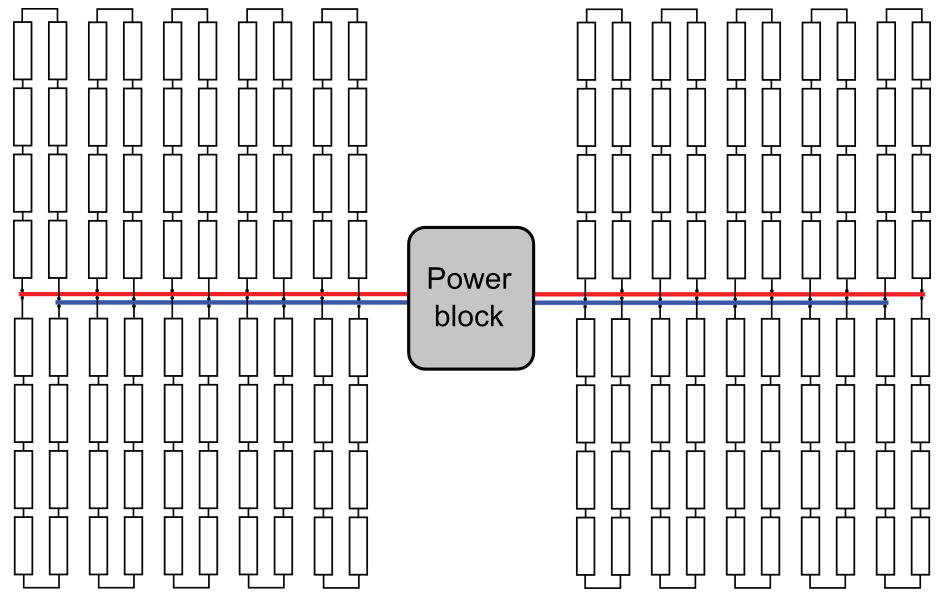

Figure 1: Onepossible field arrangement, where the field is broken up into two header sections.
Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops-one on the top and one on the bottom of the image.

## Energy balance

Within each loop, a number of SCA's are used to incrementally heat the HTF to the design outlet temperature. Each SCA is composed of a number of parabolic _collectors_ and their _receivers2_ in series that share a single common tracking drive. In this model, the SCA serves as the lowest level of discretization. Each SCA is treated as an independent calculation node within the loop, and the absorbed energy, losses, temperature, pressure drop, and other performance values are calculated independently for each SCA. This allows each SCA to impact performance separately and potentially allows each SCA to contain different receiver and/or collector attributes. System Advisor allows the user to specify unique geometry and performance characteristics for each SCA in the loop up to a limit of four unique configurations. The order in which the SCA's are defocused in the loop during high-flux conditions can also be modified under this framework. Figure 2 illustrates these principles.

Figure 1: One possible field arrangement, where the field is broken up into two header sections. Each loop in this illustration contains 8 individual SCA’s, and each portion of the header is connected to two loops - one on the top and one on the bottom of the image.

### Nodal Energy Balance
A typical steady-state receiver model determines the temperature rise across the node by considering the absorbed energy, the mass flow rate of HTF through the receiver, and the specific heat of the HTF. This energy balance for node \(i\) is represented in Eq.[2.1].

$$\Delta T_{i}=T_{out,i}-T_{in,i}=\frac{\dot{q}_{abs}}{\dot{m}_{htf}\,c_{htf}} \tag{2.1}$$

However, in the case of the parabolic trough technology, the thermal inertia associated with the energy state of the node can impact performance to the extent that a steady-state model is insufficient; thus transient terms must be included. The most significant transient effect in the solar field is the thermal mass of the HTF in the headers and in the receiver piping, so we need to consider the change in energy of the HTF in deriving the energy balance equations. We'll start with the energy balance for a single SCA node drawn in Figure 3.

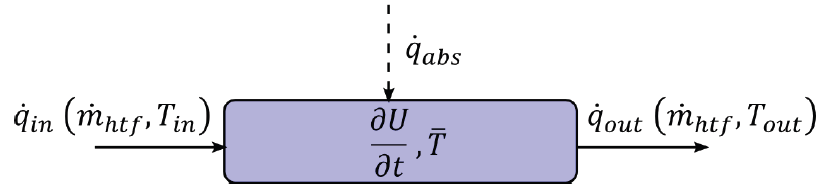

Figure 3:EnergybalanceforthereceiversinanSCA.Theenclosedboxrepresentsthecontrol volume, encompassingtheHTFwithintheabsorbertubesandpipingforasingleSCA.

The energy balance above shows a receiver tube with an inlet flow, outlet flow, absorbed energy (net absorption is positive, net loss is negative), and an internal energy term. The $\dot{q}$ heat flows are functions of the mass flow rate $\left(\dot{m}_{htf}\right)$ which is constant across the boundary, and the temperatures $T_{in}$ and $T_{out}$. The average nodal temperature $\overline{T}$ is equal to the average of the inlet and outlet temperatures of the calculation node, since the temperature rise across the node is assumed to be linear.

The internal energy term $\frac{\partial U}{\partial t}$ represents the change in energy of the node as a function of time $t$. Equivalently, this term can be expressed as:

$$\frac{\partial U}{\partial t}=\left(m\;c_{htf}+(mc)_{bal,sca}\;L\right)\;\frac {\partial T}{\partial t} \tag{2.2}$$

$$\dot{q}_{in}+\dot{q}_{abs}=\frac{\partial U}{\partial t}+\dot{q}_{out} \tag{2.3}$$

$$\dot{q}_{in}-\dot{q}_{out} = \dot{m}_{htf}\;c_{htf}\;\left(T_{in}-T_{out}\right)$$
$$= 2\;\dot{m}_{htf}\;c_{htf}\;\left(T_{in}-\overline{T}\right)\tag{2.4}$$